<a href="https://colab.research.google.com/github/kgosal2001/Data_analytics/blob/main/KaranvirGosalHW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 10 (Decision Trees)

## Introduction

CoffeeStore is a coffee wholesale company that sells coffee beans and coffee eqipment to coffee shops. The company sells two types of items online as well as in a large warehouse building.

- specialty coffee beans, in bulk (bags)
- coffee equipment and merchandise (grinders, brewing equipment, mugs, etc.)

The company has the following data on its customers' past purchases in a data file named <h3 style="color:red"> CoffeeStore.xlsx file </h3>

- age
- gender 
- number of coffee bean bags the customer ordered over the preceding year
- how much they spent on coffee products in the most recent week
- how much they spent on coffee products in the most recent month
- income 
- whether they have bought at least one product online
- new_product (whether the customer bought or not when the company introduced a new coffee machine last time

##### The company is planning to introduce a new coffee machine. It is a risky decision since the product development and marketing will be expensive. Hence it would like to assess whether a customer would buy or not if/when the company introduces a new product (a coffee machine).

<h2 style="color:red"> Your job is to conduct a decision tree analysis to help the company assess potential customer demand for the company's new product - i.e., you are interested in predicting whether a customer will buy the new coffee machine or not <h2>
    
<h4 style="color:red"> 

(1) Create an un-pruned decision tree after selecting <u> FIVE </u>appropriate features and a response variable. Assess the model's accuracy in a markdown cell


(2) Create a <u> pruned </u> version of the decision tree that you created in the previous step.  Assess the model's accuracy in a markdown cell

(3) Add a markdown cell at the end of the notebook in which you should please write your full name and SJSU ID.

(4) Download and submit your ompleted notebook as an ipynb file
    
<h4>

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
 #new product is response variable
pima = pd.read_excel("/content/CoffeeStore.xlsx", names = ['age', 'coffee_bags_bought', 'spent_last_month', 'income', 'online', 'new_product'])
pima.head(2)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,,age,coffee_bags_bought,spent_last_month,income,online,new_product
36,Female,0,24,73,42789,0,1
24,Male,0,39,119,30563,1,1


In [4]:
pima.describe()

,age,coffee_bags_bought,spent_last_month,income,online,new_product
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,2.590717,32.592827,106.727848,44731.892405,0.512658,0.639241
std,1.585211,15.758109,56.101085,25567.674430,0.500368,0.480728
min,0.000000,0.000000,0.000000,3150.000000,0.000000,0.000000
25%,1.000000,24.000000,60.000000,27284.250000,0.000000,0.000000
50%,3.000000,35.000000,113.500000,42791.500000,1.000000,1.000000
75%,4.000000,43.000000,150.000000,61621.750000,1.000000,1.000000
max,5.000000,62.000000,210.000000,172658.000000,1.000000,1.000000


In [5]:
pima.dtypes

age                   int64
coffee_bags_bought    int64
spent_last_month      int64
income                int64
online                int64
new_product           int64
dtype: object

In [6]:
pima = pima.astype(float, errors = 'raise')

In [7]:
pima.dtypes

age                   float64
coffee_bags_bought    float64
spent_last_month      float64
income                float64
online                float64
new_product           float64
dtype: object

In [8]:
feature_cols = ['age', 'coffee_bags_bought', 'spent_last_month', 'income', 'online']
X = pima[feature_cols] 
y = pima.new_product 

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [21]:
y_pred

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0.])

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8041958041958042


In [13]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

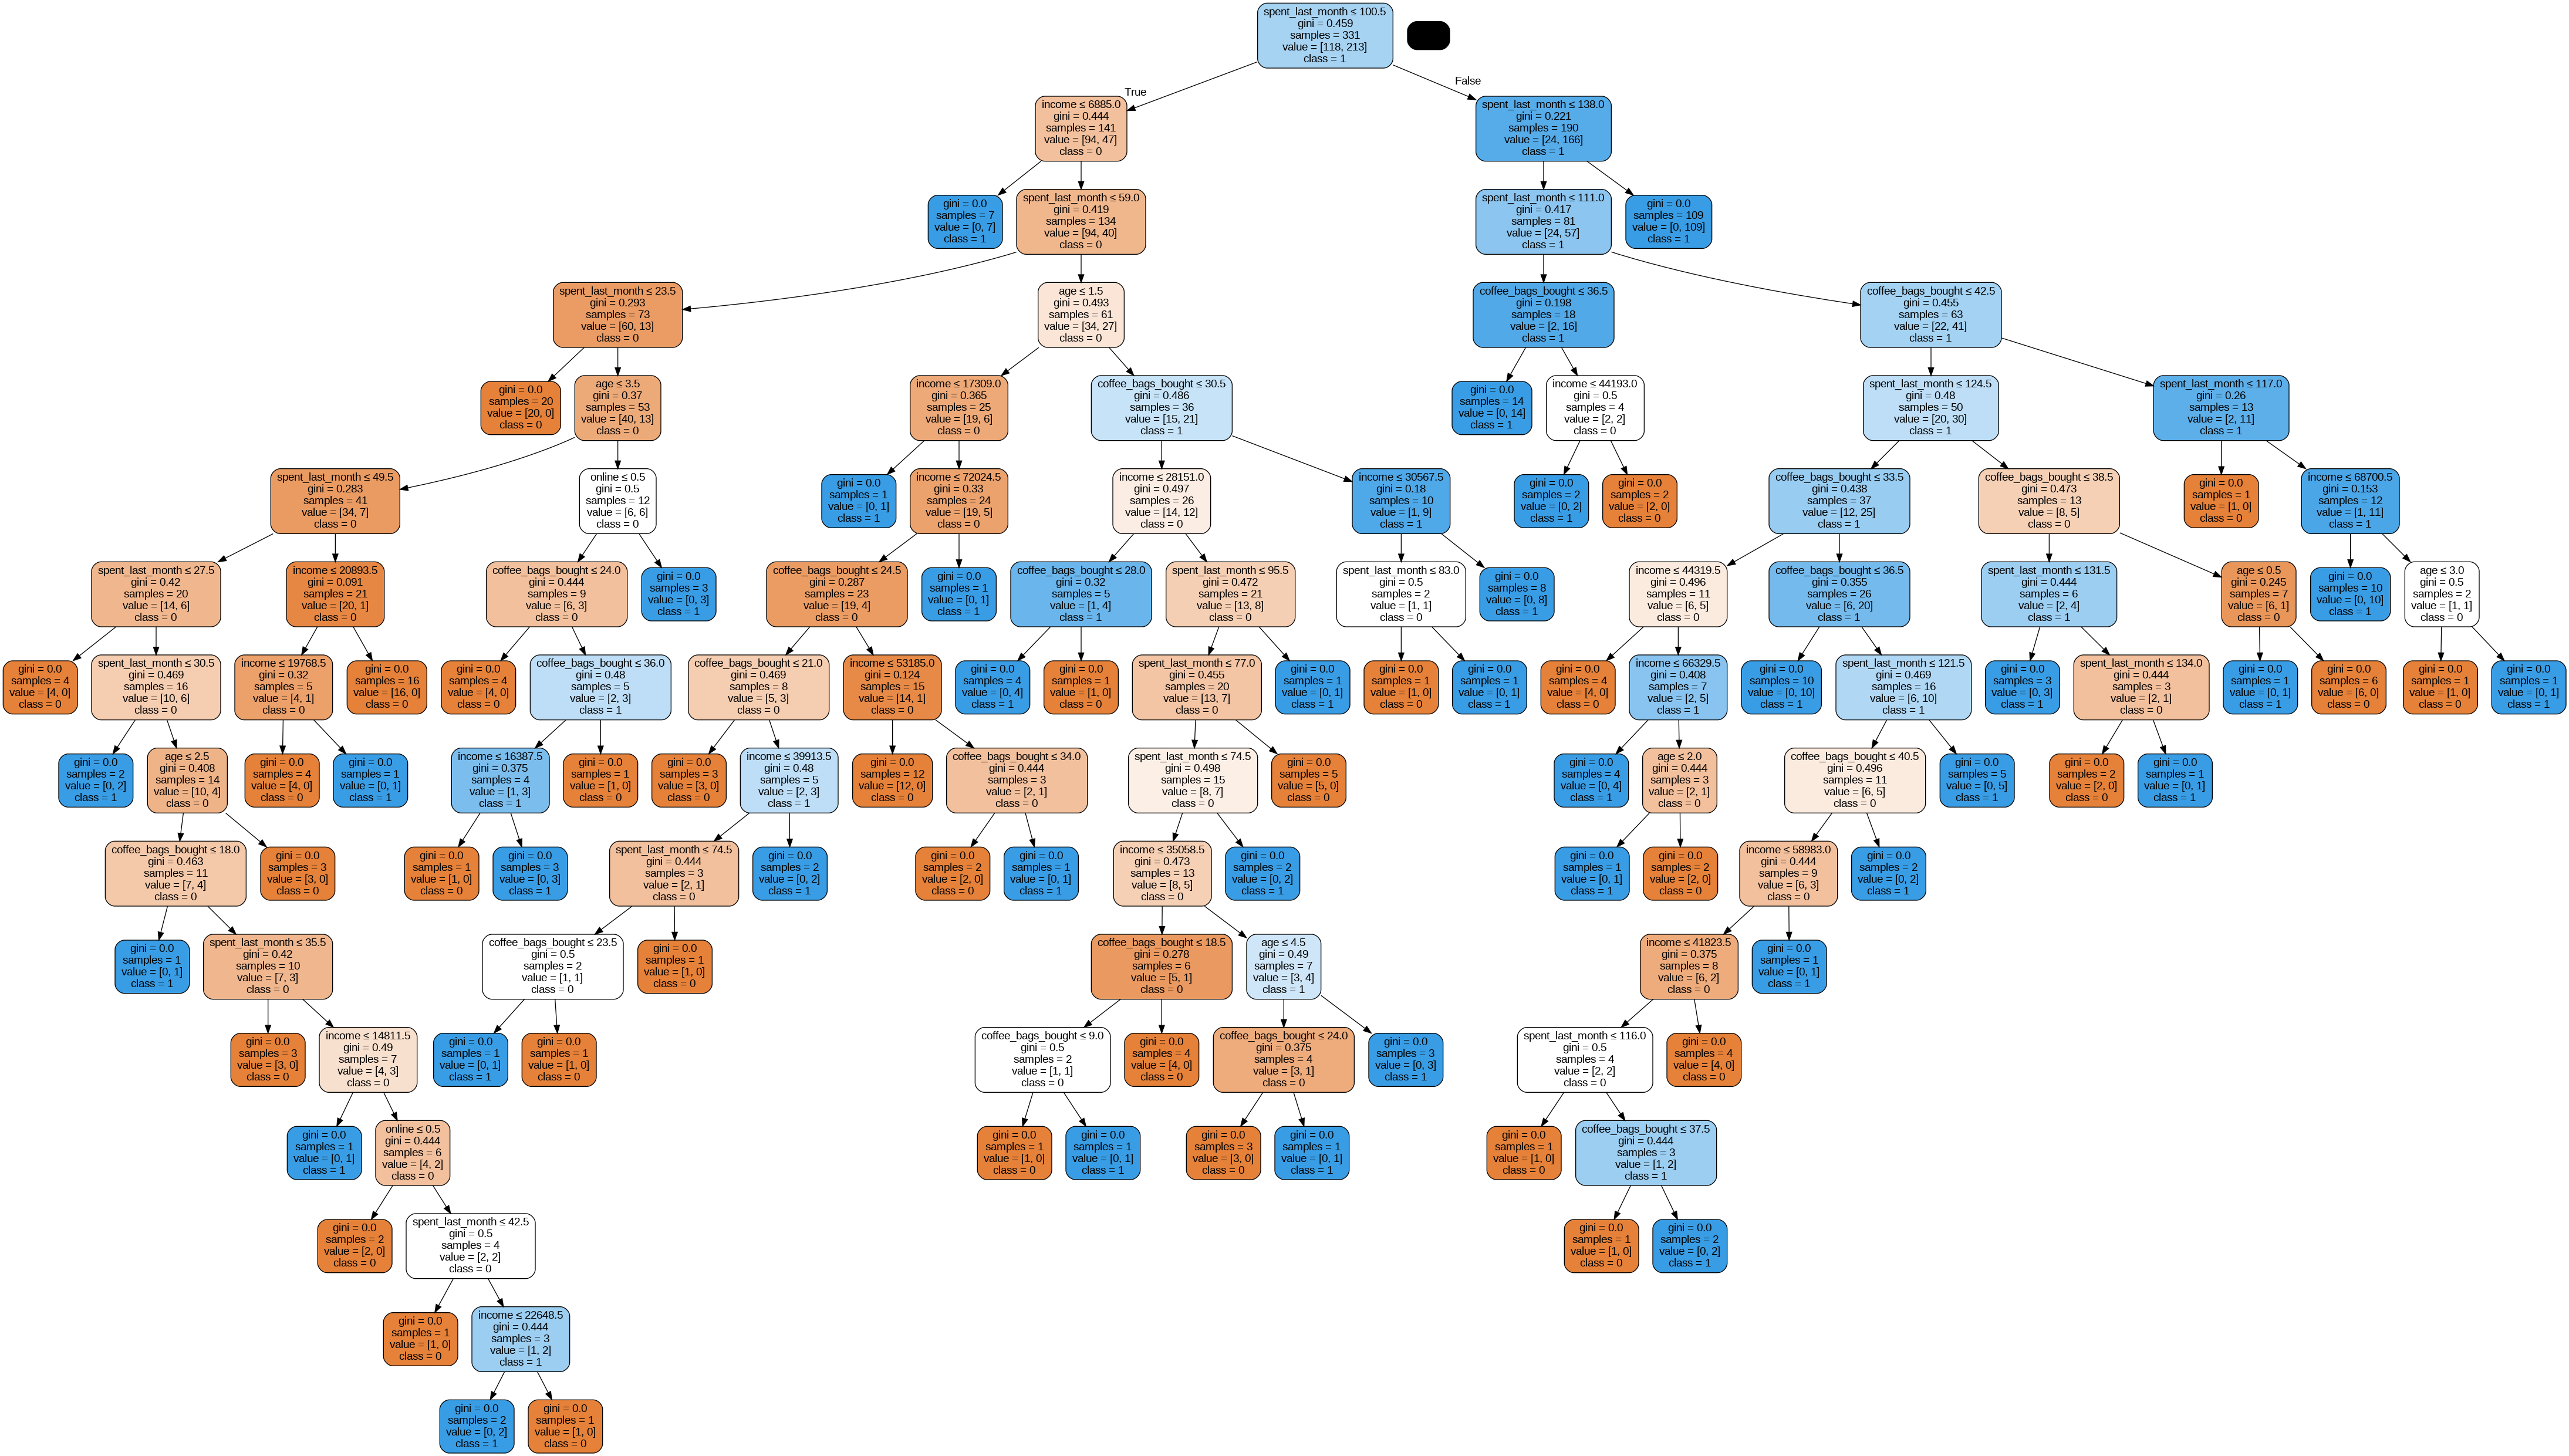

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six  import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [18]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7832167832167832


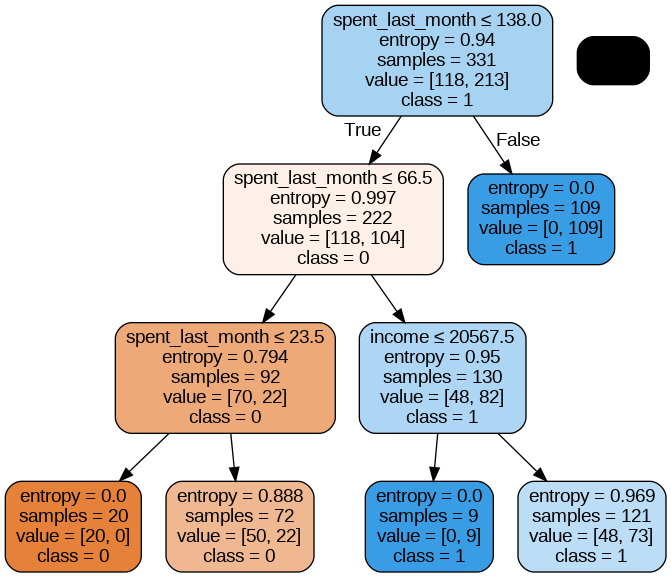

In [16]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# **Model Accuracy**

Un-Pruned Model Accuracy: 0.80419 - 80.42%

Pruned Version Model Accuracy: 0.78321 - 78.33%


**Name:** Karanvir Gosal

**SJSU ID:** 015532270